In [75]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
# import csv files
df1 = pd.read_csv('/home/husainmalwat/projects/srip/Raw_data_1Hr_2022_site_117_ITO_Delhi_CPCB_1Hr.csv')
df2 = pd.read_csv('/home/husainmalwat/projects/srip/Raw_data_1Hr_2023_site_117_ITO_Delhi_CPCB_1Hr.csv')

In [2]:
df1.head(5)

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2022-01-01 00:00:00,306.50,355.75,59.20,40.95,69.90,22.75,13.82,3.98,10.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 01:00:00,310.50,371.00,47.02,35.88,57.28,24.65,12.27,3.31,10.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 02:00:00,281.25,341.75,44.32,36.25,55.35,24.20,11.77,2.90,10.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 03:00:00,256.00,310.00,36.60,30.35,45.90,26.02,9.98,2.34,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 04:00:00,202.00,248.00,33.28,28.82,42.40,25.80,9.28,1.98,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2.head(5)

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2023-01-01 00:00:00,159.00,162.500000,170.225000,44.600000,162.100,97.525,7.50,2.147500,8.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01 01:00:00,148.00,150.500000,154.175000,36.300000,144.675,115.925,7.40,1.737500,8.350000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01 02:00:00,126.00,129.333333,142.766667,30.133333,132.100,111.600,7.20,1.496667,8.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01 03:00:00,118.25,122.000000,140.950000,26.675000,128.775,107.100,7.25,1.515000,8.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01 04:00:00,105.75,109.750000,112.150000,20.650000,102.150,117.675,4.75,1.197500,8.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df = pd.concat([df1, df2])

In [25]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# extract two columns from dataframe
df_NO = df[['Timestamp', 'NO (µg/m³)']]

In [27]:
df_NO

,Timestamp,NO (µg/m³)
0,2022-01-01 00:00:00,59.200
1,2022-01-01 01:00:00,47.020
2,2022-01-01 02:00:00,44.320
3,2022-01-01 03:00:00,36.600
4,2022-01-01 04:00:00,33.280
...,...,...
8755,2023-12-31 19:00:00,16.550
8756,2023-12-31 20:00:00,14.850
8757,2023-12-31 21:00:00,13.775
8758,2023-12-31 22:00:00,13.750


In [28]:
def convert_excel_to_csv(excel_file_path, csv_file_path):
    try:
        # Read Excel file into a Pandas DataFrame
        df = pd.read_excel(excel_file_path)

        # Save the DataFrame to a CSV file
        df.to_csv(csv_file_path, index=False)

        print(f"Conversion successful. CSV file saved at: {csv_file_path}")

    except Exception as e:
        print(f"Error: {e}")

# Example usage
excel_file_path = "/home/husainmalwat/projects/srip/gt.xlsx"
csv_file_path = "/home/husainmalwat/projects/srip/gt.csv"
convert_excel_to_csv(excel_file_path, csv_file_path)


Conversion successful. CSV file saved at: /home/husainmalwat/projects/srip/gt.csv


In [65]:
gt = pd.read_csv('/home/husainmalwat/projects/srip/gt.csv')

In [66]:
gt

,CENTRAL POLLUTION CONTROL BOARD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,CONTINUOUS AMBIENT AIR QUALITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Date: Tuesday, Mar 05 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Time: 08:22:02 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Station,"ITO, Delhi - CPCB",NaN,NaN,NaN,NaN,NaN,NaN
4,Parameter,"NO,NO2,NOx,Ozone,CO,NH3,PM10,PM2.5,Benzene,SO2",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
363,02-01-2024 19:00,02-01-2024 19:15,346,239,6.53,24,NaN,NaN
364,02-01-2024 19:15,02-01-2024 19:30,365,257,7.07,24,NaN,NaN
365,02-01-2024 19:30,02-01-2024 19:45,369,266,7.55,23.2,NaN,NaN
366,02-01-2024 19:45,02-01-2024 20:00,358,264,7.57,22.7,NaN,NaN


In [67]:
gt = gt.iloc[11:]

In [68]:
columns = gt.iloc[0].tolist()

In [69]:
columns[0] = 'Timestamp'
gt.columns = columns

gt

,Timestamp,To Date,NO,NO2,NOx,Ozone,CO,NH3
11,From Date,To Date,NO,NO2,NOx,Ozone,CO,NH3
12,01-01-2024 00:00,01-01-2024 00:15,15.5,21,23.8,8.9,1.04,17.5
13,01-01-2024 00:15,01-01-2024 00:30,14.7,17.8,21.4,8.9,1.21,16.4
14,01-01-2024 00:30,01-01-2024 00:45,14.1,15.4,19.6,8.9,1.08,15.7
15,01-01-2024 00:45,01-01-2024 01:00,14.2,16,20,8.9,1.05,14.4
...,...,...,...,...,...,...,...,...
363,02-01-2024 19:00,02-01-2024 19:15,346,239,6.53,24,NaN,NaN
364,02-01-2024 19:15,02-01-2024 19:30,365,257,7.07,24,NaN,NaN
365,02-01-2024 19:30,02-01-2024 19:45,369,266,7.55,23.2,NaN,NaN
366,02-01-2024 19:45,02-01-2024 20:00,358,264,7.57,22.7,NaN,NaN


In [70]:
gt = gt.iloc[1:]
gt_NO = gt[['Timestamp','NO']]
gt_NO.columns = ['Timestamp', 'NO (µg/m³)']
gt_NO

,Timestamp,NO (µg/m³)
12,01-01-2024 00:00,15.5
13,01-01-2024 00:15,14.7
14,01-01-2024 00:30,14.1
15,01-01-2024 00:45,14.2
16,01-01-2024 01:00,15
...,...,...
363,02-01-2024 19:00,346
364,02-01-2024 19:15,365
365,02-01-2024 19:30,369
366,02-01-2024 19:45,358


In [85]:
lst_NO = df_NO['NO (µg/m³)'].tolist()
lst_gt_NO = gt_NO['NO (µg/m³)'].tolist()
print(len(lst_NO), len(lst_gt_NO))

17520 356


## 2. Autoregressive Integrated Moving Average (ARIMA):


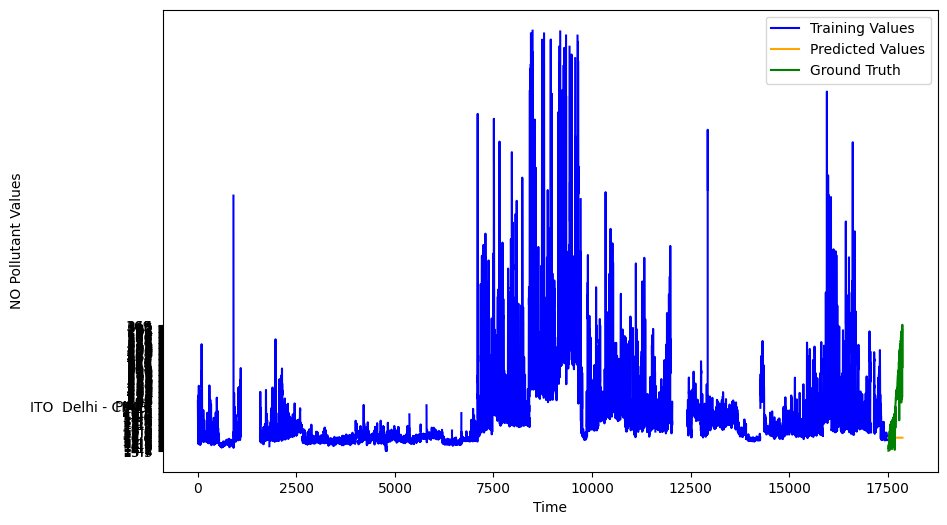

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def arima_predict_and_plot(previous_values, ground_truth, p, d, q):
    """
    Predict next values using ARIMA model and plot the results.

    Parameters:
    - previous_values (list or numpy array): Time series values for the previous 2 years.
    - ground_truth (list or numpy array): Ground truth values for the next 1 day.
    - p (int): Order of the AR component of the ARIMA model.
    - d (int): Order of the differencing in the ARIMA model.
    - q (int): Order of the MA component of the ARIMA model.
    """

    # Convert the input lists to numpy arrays
    previous_values = np.array(previous_values)
    ground_truth = np.array(ground_truth)

    # Define the ARIMA model with the specified order
    model = ARIMA(previous_values, order=(p, d, q))

    # Fit the ARIMA model to the data
    model_fit = model.fit()

    # Forecast the next values
    forecast_values = model_fit.forecast(steps=len(ground_truth))

    # Plot the training values, predicted values, and ground truth
    plt.figure(figsize=(10, 6))
    plt.plot(previous_values, label='Training Values', color='blue')
    plt.plot(np.arange(len(previous_values), len(previous_values) + len(forecast_values)),
             forecast_values, label='Predicted Values', color='orange')
    plt.plot(np.arange(len(previous_values), len(previous_values) + len(ground_truth)),
             ground_truth, label='Ground Truth', color='green')

    plt.xlabel('Time')
    plt.ylabel('NO Pollutant Values')
    plt.legend()
    plt.show()

    return forecast_values

# Example usage:
# Replace the ellipses with your actual data
# Adjust the values of p, d, q based on your data characteristics
outputs = arima_predict_and_plot(previous_values=lst_NO, ground_truth=lst_gt_NO, p=20, d=1, q=0)


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline

def linear_regression_with_fourier_features(previous_values, ground_truth, n_fourier_features=100):
    """
    Predict next values using linear regression with random Fourier features and plot the results.

    Parameters:
    - previous_values (list or numpy array): Time series values for the previous 2 years.
    - ground_truth (list or numpy array): Ground truth values for the next 1 day.
    - n_fourier_features (int): Number of random Fourier features to generate.

    Note: You might need to adjust the hyperparameters based on your data characteristics.
    """

    # Convert the input lists to numpy arrays
    previous_values = np.array(previous_values)
    ground_truth = np.array(ground_truth)

    # Generate random Fourier features
    feature_map = RBFSampler(n_components=n_fourier_features, random_state=42)
    
    # Create a linear regression model with random Fourier features
    model = make_pipeline(feature_map, LinearRegression())

    # Reshape the input data for scikit-learn
    X_train = previous_values[:-1].reshape(-1, 1)
    y_train = previous_values[1:]

    # Fit the model to the data
    model.fit(X_train, y_train)

    # Predict the next values
    forecast_values = model.predict(ground_truth[:-1].reshape(-1, 1))

    # Plot the training values, predicted values, and ground truth
    plt.figure(figsize=(10, 6))
    plt.plot(previous_values, label='Training Values', color='blue')
    plt.plot(np.arange(len(previous_values), len(previous_values) + len(forecast_values)),
             forecast_values, label='Predicted Values', color='orange')
    plt.plot(np.arange(len(previous_values), len(previous_values) + len(ground_truth)),
             ground_truth, label='Ground Truth', color='green')

    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.show()


filtered_list = [value for value in lst_NO if not math.isnan(value)]

linear_regression_with_fourier_features(previous_values=filtered_list, ground_truth=lst_gt_NO, n_fourier_features=100)


ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [128]:
import re
df_lst = [re.sub(r'\([^)]*\)', '', x).strip() for x in df_lst]

print(df_lst)

['Timestamp']


In [130]:
common_elements = [element for element in df_lst if element in gt_lst]

print("Common Elements:", common_elements)

Common Elements: ['Timestamp']


In [123]:
len(gt_lst),len(df_lst)

(8, 25)

In [125]:
# Find columns with NaN values
columns_with_nan = df.columns[df.isna().any()].tolist()

# Print columns with NaN values
print("Columns with NaN values:", columns_with_nan)

# Remove columns with NaN values
df_cleaned = df.drop(columns=columns_with_nan)

Columns with NaN values: ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)']


In [131]:
print(df_lst, gt_lst)

['Timestamp'] ['Timestamp', 'To Date', 'NO', 'NO2', 'NOx', 'Ozone', 'CO', 'NH3']


In [57]:
# Save the extracted DataFrame to a CSV file
output_csv_file_path = "/home/husainmalwat/projects/srip/gt.csv"
df_new.to_csv(output_csv_file_path, index=False)

print(f"Extracted rows saved to: {output_csv_file_path}")

Extracted rows saved to: /home/husainmalwat/projects/srip/gt.csv


In [58]:
gt = pd.read_csv('/home/husainmalwat/projects/srip/gt.csv')
gt.head(10)

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2022-01-01 11:00:00,193.25,233.75,8.30,14.35,14.35,33.48,11.85,1.16,15.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 12:00:00,183.00,225.50,8.10,15.15,14.65,33.40,13.15,1.11,23.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 13:00:00,193.50,234.50,8.35,14.60,14.58,34.12,16.55,1.08,27.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 14:00:00,153.50,186.00,7.93,14.58,14.20,33.65,24.83,0.87,27.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 15:00:00,135.00,163.50,9.12,15.05,15.45,34.53,25.62,0.95,25.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-01-01 16:00:00,125.00,153.50,10.07,16.27,16.85,35.03,20.42,1.12,16.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-01-01 17:00:00,136.25,168.25,29.88,22.45,36.22,33.58,14.35,2.63,10.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-01-01 18:00:00,164.25,214.50,48.92,31.18,56.38,28.75,16.25,3.42,10.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-01-01 19:00:00,234.00,285.50,64.95,38.52,73.30,25.40,19.17,4.56,10.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-01-01 20:00:00,266.25,323.50,65.82,42.35,76.05,24.22,19.52,4.96,10.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
gt

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2022-01-01 11:00:00,193.25,233.750000,8.300,14.350,14.350000,33.480,11.850,1.160000,15.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 12:00:00,183.00,225.500000,8.100,15.150,14.650000,33.400,13.150,1.110000,23.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 13:00:00,193.50,234.500000,8.350,14.600,14.580000,34.120,16.550,1.080000,27.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 14:00:00,153.50,186.000000,7.930,14.580,14.200000,33.650,24.830,0.870000,27.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 15:00:00,135.00,163.500000,9.120,15.050,15.450000,34.530,25.620,0.950000,25.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,2023-12-31 19:00:00,246.75,353.250000,16.550,26.700,27.675000,18.725,4.675,1.585000,8.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17505,2023-12-31 20:00:00,234.00,317.500000,14.850,18.575,21.950000,15.575,16.050,1.227500,8.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17506,2023-12-31 21:00:00,188.25,259.750000,13.775,14.825,19.100000,14.150,21.450,1.335000,8.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17507,2023-12-31 22:00:00,185.75,247.750000,13.750,16.550,19.950000,13.650,20.700,1.257500,8.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2022-01-01 00:00:00,306.50,355.750000,59.200,40.950,69.900000,22.750,13.820,3.980000,10.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01 01:00:00,310.50,371.000000,47.020,35.880,57.280000,24.650,12.270,3.310000,10.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01 02:00:00,281.25,341.750000,44.320,36.250,55.350000,24.200,11.770,2.900000,10.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01 03:00:00,256.00,310.000000,36.600,30.350,45.900000,26.020,9.980,2.340000,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01 04:00:00,202.00,248.000000,33.280,28.820,42.400000,25.800,9.280,1.980000,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,246.75,353.250000,16.550,26.700,27.675000,18.725,4.675,1.585000,8.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,2023-12-31 20:00:00,234.00,317.500000,14.850,18.575,21.950000,15.575,16.050,1.227500,8.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,2023-12-31 21:00:00,188.25,259.750000,13.775,14.825,19.100000,14.150,21.450,1.335000,8.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,2023-12-31 22:00:00,185.75,247.750000,13.750,16.550,19.950000,13.650,20.700,1.257500,8.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your data
# Assuming your dataframe is named 'df'
# Convert 'Timestamp' to datetime if it's not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Function for ARIMA forecasting
def arima_forecast(data, column_name, date, steps=24):
    # Filter data for the specified column and date
    subset = data[data['Timestamp'] < date]
    
    # Fit ARIMA model
    model = ARIMA(subset[column_name], order=(5, 1, 0))  # Adjust order as needed
    model_fit = model.fit()
    
    # Forecast next 'steps' values
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Example usage
forecast_date = pd.to_datetime('2024-01-01 00:00:00')
column_to_forecast = 'PM2.5 (µg/m³)'
forecast_steps = 24  # Number of hours to forecast

# Get true data for the forecast date
true_data = df[(df['Timestamp'] >= forecast_date) & (df['Timestamp'] < forecast_date + pd.DateOffset(days=1))]

# Get hourly forecast
hourly_forecast = arima_forecast(df, column_to_forecast, forecast_date, steps=forecast_steps)

# Calculate errors
mae = mean_absolute_error(true_data[column_to_forecast], hourly_forecast)
mse = mean_squared_error(true_data[column_to_forecast], hourly_forecast)
rmse = mean_squared_error(true_data[column_to_forecast], hourly_forecast, squared=False)

# Print errors
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


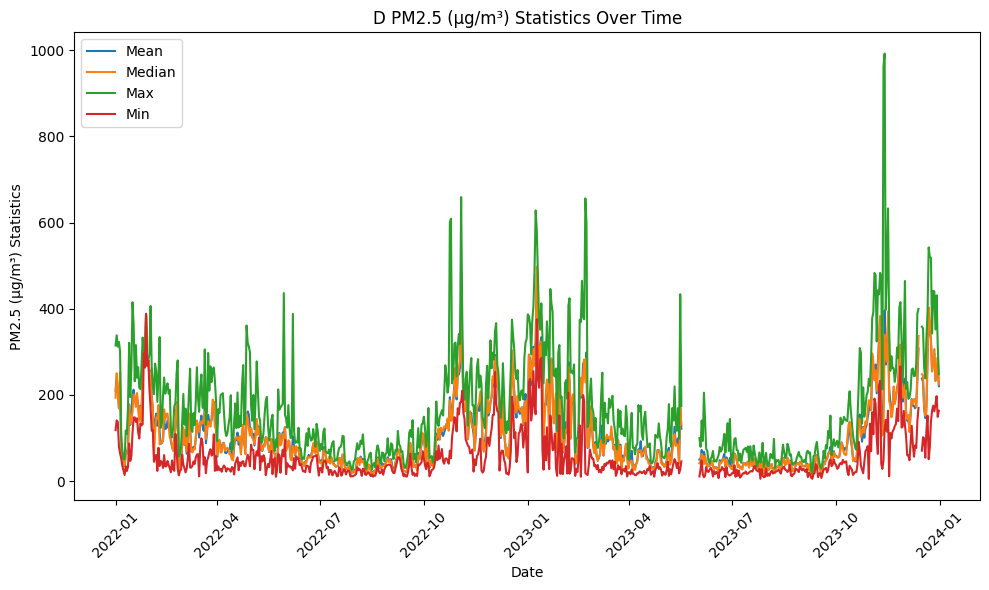

Daily Statistics:
        Date        Mean   Median     Max     Min
0 2022-01-01  209.927083  193.375  314.50  118.25
1 2022-01-02  241.989583  250.250  338.25  140.75
2 2022-01-03  211.989583  204.125  312.00  137.00
3 2022-01-04  168.774167  169.375  323.00   79.25
4 2022-01-05  212.260417  253.000  300.00   64.25

Monthly Statistics:
       Month        Mean   Median     Max    Min
0 2022-01-31  153.190400  148.625  415.00  14.00
1 2022-02-28  119.364828  107.250  406.25  13.33
2 2022-03-31  117.793537  109.250  305.50  11.00
3 2022-04-30   90.904513   77.125  361.00  15.25
4 2022-05-31   93.368237   86.750  436.25  10.00


In [29]:
import pandas as pd
import os
def generate_time_statistics(df, parameter, output_folder):
    """
    Generate daily and monthly statistics for a given parameter in the time series data.

    Parameters:
    - df: DataFrame with timestamp index and the parameter of interest
    - parameter: Column name representing the air quality parameter
    - output_folder: Folder path to save the CSV files

    Returns:
    - daily_stats_df: DataFrame containing daily statistics
    - monthly_stats_df: DataFrame containing monthly statistics
    """
    try:
        # Ensure 'Timestamp' column is of datetime type and set as the index
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df.set_index('Timestamp', inplace=True)
    except:
        pass

    # Resample to daily and calculate daily statistics
    daily_stats_df = df[parameter].resample('D').agg(['mean', 'median', 'max', 'min']).reset_index()
    daily_stats_df.columns = ['Date', 'Mean', 'Median', 'Max', 'Min']

    # Resample to monthly and calculate monthly statistics
    monthly_stats_df = df[parameter].resample('M').agg(['mean', 'median', 'max', 'min']).reset_index()
    monthly_stats_df.columns = ['Month', 'Mean', 'Median', 'Max', 'Min']

    # Save daily and monthly statistics to CSV files
    daily_stats_df.to_csv(f'{output_folder}/daily_statistics.csv', index=False)
    monthly_stats_df.to_csv(f'{output_folder}/monthly_statistics.csv', index=False)

    return daily_stats_df, monthly_stats_df


import pandas as pd
import matplotlib.pyplot as plt
import calendar  # For getting month abbreviations

# Function to generate time statistics
def generate_hourly_time_statistics(df, parameter, output_folder, frequency='D'):
    """
    Generate daily or hourly statistics for a given parameter in the time series data.

    Parameters:
    - df: DataFrame with timestamp index and the parameter of interest
    - parameter: Column name representing the air quality parameter
    - output_folder: Folder path to save the CSV files
    - frequency: 'D' for daily or 'H' for hourly statistics

    Returns:
    - stats_df: DataFrame containing statistics
    """
    try:
        # Ensure 'Timestamp' column is of datetime type and set as the index
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df.set_index('Timestamp', inplace=True)
    except:
        pass

    # Resample and calculate statistics
    stats_df = df[parameter].resample(frequency).agg(['mean', 'median', 'max', 'min']).reset_index()
    stats_df.columns = ['Date', 'Mean', 'Median', 'Max', 'Min']

    # Save statistics to a CSV file
    stats_df.to_csv(f'{output_folder}/{frequency.lower()}_statistics.csv', index=False)

    return stats_df


# Example usage for daily statistics
output_folder_daily = '/home/husainmalwat/projects/srip/outputs/daily'
os.makedirs(output_folder_daily, exist_ok=True)

daily_stats = generate_hourly_time_statistics(df, parameter_of_interest, output_folder_daily, frequency='D')
plot_hourly_statistics(daily_stats, parameter_of_interest, frequency='D')

# Example usage for hourly statistics
output_folder_hourly = '/home/husainmalwat/projects/srip/outputs/hourly'
os.makedirs(output_folder_hourly, exist_ok=True)

hourly_stats = generate_hourly_time_statistics(df, parameter_of_interest, output_folder_hourly, frequency='H')



output_folder = '/home/husainmalwat/projects/srip/outputs'  # Specify the folder where you want to save the CSV files
parameter_of_interest = 'PM2.5 (µg/m³)'  # Specify the air quality parameter of interest
os.makedirs(output_folder, exist_ok=True)
daily_stats, monthly_stats = generate_time_statistics(df, parameter_of_interest, output_folder)

# Display the generated DataFrames
print("Daily Statistics:")
print(daily_stats.head())

print("\nMonthly Statistics:")
print(monthly_stats.head())




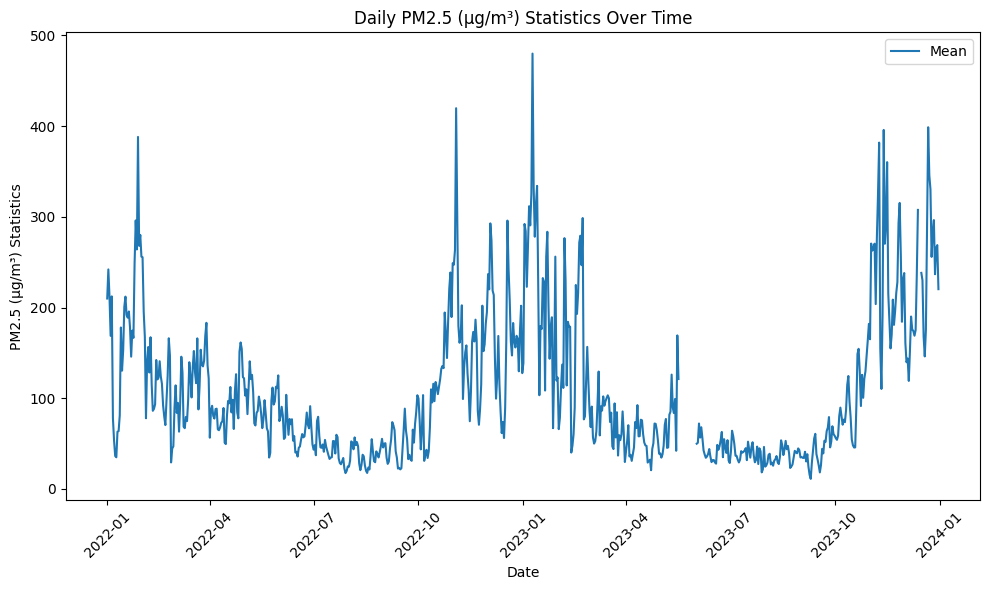

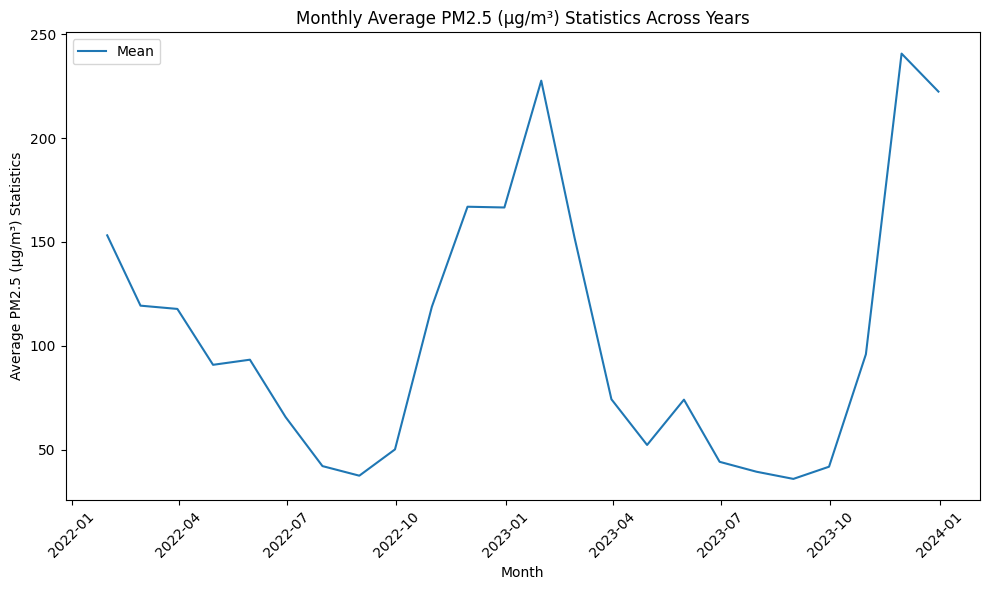

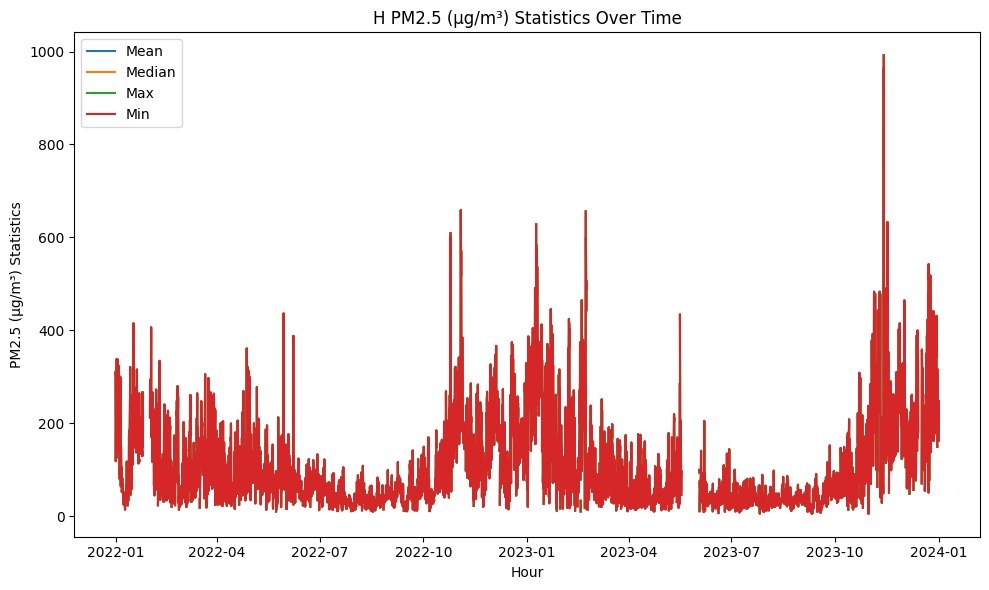

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar  # For getting month abbreviations

# Function to plot line graph for statistics
def plot_hourly_statistics(stats_df, parameter, frequency):
    plt.figure(figsize=(10, 6))
    plt.plot(stats_df['Date'], stats_df['Mean'], label='Mean')
    plt.plot(stats_df['Date'], stats_df['Median'], label='Median')
    plt.plot(stats_df['Date'], stats_df['Max'], label='Max')
    plt.plot(stats_df['Date'], stats_df['Min'], label='Min')

    plt.xlabel('Date' if frequency == 'D' else 'Hour')
    plt.ylabel(f'{parameter} Statistics')
    plt.title(f'{frequency.capitalize()} {parameter} Statistics Over Time')
    plt.legend()
    plt.xticks(rotation=45) if frequency == 'D' else None
    plt.tight_layout()
    plt.show()

# Function to plot line graph for daily statistics
def plot_daily_statistics(daily_stats, parameter):
    plt.figure(figsize=(10, 6))
    plt.plot(daily_stats['Date'], daily_stats['Mean'], label='Mean')

    plt.xlabel('Date')
    plt.ylabel(f'{parameter} Statistics')
    plt.title(f'Daily {parameter} Statistics Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to plot line graph for monthly statistics with three-letter month abbreviations
def plot_monthly_statistics(monthly_stats, parameter):
    # Group by month and calculate the average value for each month
    monthly_average = monthly_stats.groupby('Month').mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(monthly_average['Month'], monthly_average['Mean'], label='Mean')

    plt.xlabel('Month')
    plt.ylabel(f'Average {parameter} Statistics')
    plt.title(f'Monthly Average {parameter} Statistics Across Years')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
plot_daily_statistics(daily_stats, parameter_of_interest)
plot_monthly_statistics(monthly_stats, parameter_of_interest)
plot_hourly_statistics(hourly_stats, parameter_of_interest, frequency='H')


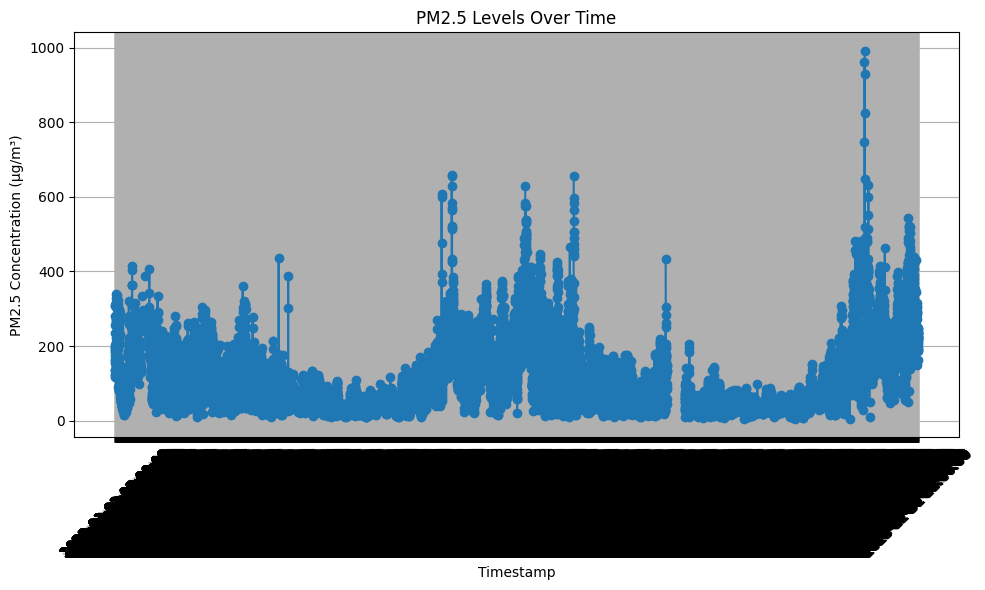

PM2.5 Statistics: {'Mean': 104.43777369772855, 'Median': 71.5, 'Max': 992.0, 'Min': 5.0}


In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Function to plot air quality parameters over time
def plot_air_quality(df, parameter, y_label, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Timestamp'], df[parameter], marker='o')
    plt.xlabel('Timestamp')
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
plot_air_quality(df, 'PM2.5 (µg/m³)', 'PM2.5 Concentration (µg/m³)', 'PM2.5 Levels Over Time')

# Function to calculate statistical measures
def calculate_statistics(df, parameter):
    mean_value = df[parameter].mean()
    median_value = df[parameter].median()
    max_value = df[parameter].max()
    min_value = df[parameter].min()

    return {
        'Mean': mean_value,
        'Median': median_value,
        'Max': max_value,
        'Min': min_value,
    }

# Example usage
pm25_statistics = calculate_statistics(df, 'PM2.5 (µg/m³)')
print('PM2.5 Statistics:', pm25_statistics)


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a Pandas DataFrame
# Assuming the data is loaded into a DataFrame named df as shown in the previous example

# Function to plot air quality parameters over time
def plot_air_quality(df, parameters):
    plt.figure(figsize=(15, 12))

    for i, parameter in enumerate(parameters, 1):
        plt.subplot(4, 3, i)
        plt.plot(df['Timestamp'], df[parameter], marker='o')
        plt.xlabel('Timestamp')
        plt.ylabel(parameter)
        plt.title(f'{parameter} Over Time')
        plt.grid(True)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Example usage - Plotting multiple parameters
air_quality_parameters = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)',
                           'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)']

plot_air_quality(df, air_quality_parameters)

# Function to plot statistics for air quality parameters
def plot_statistics(df, parameters):
    plt.figure(figsize=(15, 6))

    for i, parameter in enumerate(parameters, 1):
        plt.subplot(2, 5, i)
        plt.boxplot(df[parameter].dropna())
        plt.title(f'{parameter} Statistics')

    plt.tight_layout()
    plt.show()

# Example usage - Plotting statistics for multiple parameters
plot_statistics(df, air_quality_parameters)

# Function to calculate and print statistics for air quality parameters
def calculate_and_print_statistics(df, parameters):
    for parameter in parameters:
        statistics = calculate_statistics(df, parameter)
        print(f'{parameter} Statistics:', statistics)

# Example usage - Calculating and printing statistics for multiple parameters
calculate_and_print_statistics(df, air_quality_parameters)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f81bc003f40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

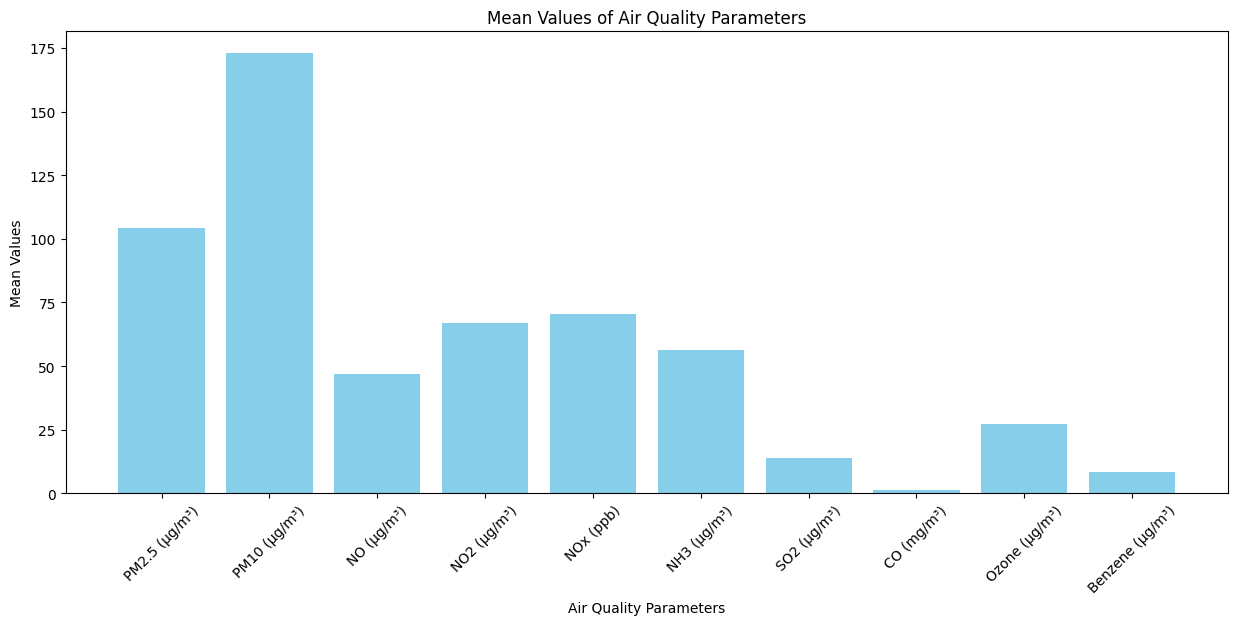

NameError: name 'calculate_statistics' is not defined

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a Pandas DataFrame
# Assuming the data is loaded into a DataFrame named df as shown in the previous examples

# Function to create a bar plot for mean values of each parameter
def bar_plot_means(df, parameters):
    plt.figure(figsize=(15, 6))
    mean_values = [df[parameter].mean() for parameter in parameters]
    plt.bar(parameters, mean_values, color='skyblue')
    plt.xlabel('Air Quality Parameters')
    plt.ylabel('Mean Values')
    plt.title('Mean Values of Air Quality Parameters')
    plt.xticks(rotation=45)
    plt.show()

# Example usage - Bar plot for mean values
bar_plot_means(df, lst)

# Function to create a stacked bar plot for multiple statistical measures
def stacked_bar_plot_statistics(df, parameters):
    statistics_df = pd.DataFrame({parameter: calculate_statistics(df, parameter) for parameter in parameters})
    statistics_df.plot(kind='bar', stacked=True, figsize=(15, 6))
    plt.xlabel('Air Quality Parameters')
    plt.ylabel('Values')
    plt.title('Statistical Measures of Air Quality Parameters')
    plt.xticks(rotation=45)
    plt.show()

# Example usage - Stacked bar plot for multiple statistical measures
stacked_bar_plot_statistics(df, lst)

# Function to create a box plot for the distribution of each parameter
def box_plot_distribution(df, parameters):
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df[parameters].dropna(), palette='Set3')
    plt.xlabel('Air Quality Parameters')
    plt.ylabel('Values')
    plt.title('Distribution of Air Quality Parameters')
    plt.xticks(rotation=45)
    plt.show()

air_quality_parameters = lst
# Example usage - Box plot for the distribution of parameters
box_plot_distribution(df, air_quality_parameters)


In [31]:
lst = list(df.columns)[1:]
print(lst)

['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)']


In [16]:
df.head

<bound method NDFrame.head of                 Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  \
0     2022-01-01 00:00:00         306.50    355.750000      59.200   
1     2022-01-01 01:00:00         310.50    371.000000      47.020   
2     2022-01-01 02:00:00         281.25    341.750000      44.320   
3     2022-01-01 03:00:00         256.00    310.000000      36.600   
4     2022-01-01 04:00:00         202.00    248.000000      33.280   
...                   ...            ...           ...         ...   
8755  2023-12-31 19:00:00         246.75    353.250000      16.550   
8756  2023-12-31 20:00:00         234.00    317.500000      14.850   
8757  2023-12-31 21:00:00         188.25    259.750000      13.775   
8758  2023-12-31 22:00:00         185.75    247.750000      13.750   
8759  2023-12-31 23:00:00         163.00    217.333333      14.700   

      NO2 (µg/m³)  NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  \
0          40.950  69.900000       22.750       13.820    3